In [69]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math


# Distributions

In [70]:
# Histogram plotting function for continuous variables
def histogram_plots(df, columns, num_cols, bins=30, figsize=(12, 8)):
    """
    Create histogram plots for multiple variables in a grid layout.
    
    Parameters:
    df (DataFrame): The pandas DataFrame containing the data
    columns (list): List of column names to plot
    num_cols (int): Number of columns in the grid layout
    bins (int): Number of bins for histograms (default: 30)
    figsize (tuple): Figure size (width, height) (default: (12, 8))
    """
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=figsize)
    
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        df[columns[i]].hist(ax=ax, bins=bins, grid=False, alpha=0.7, edgecolor='black')
        ax.set_xlabel(columns[i])
        ax.set_title(f'Distribution of {columns[i]}')
    
    fig.tight_layout()
    fig.supylabel('Frequency')
    plt.show()


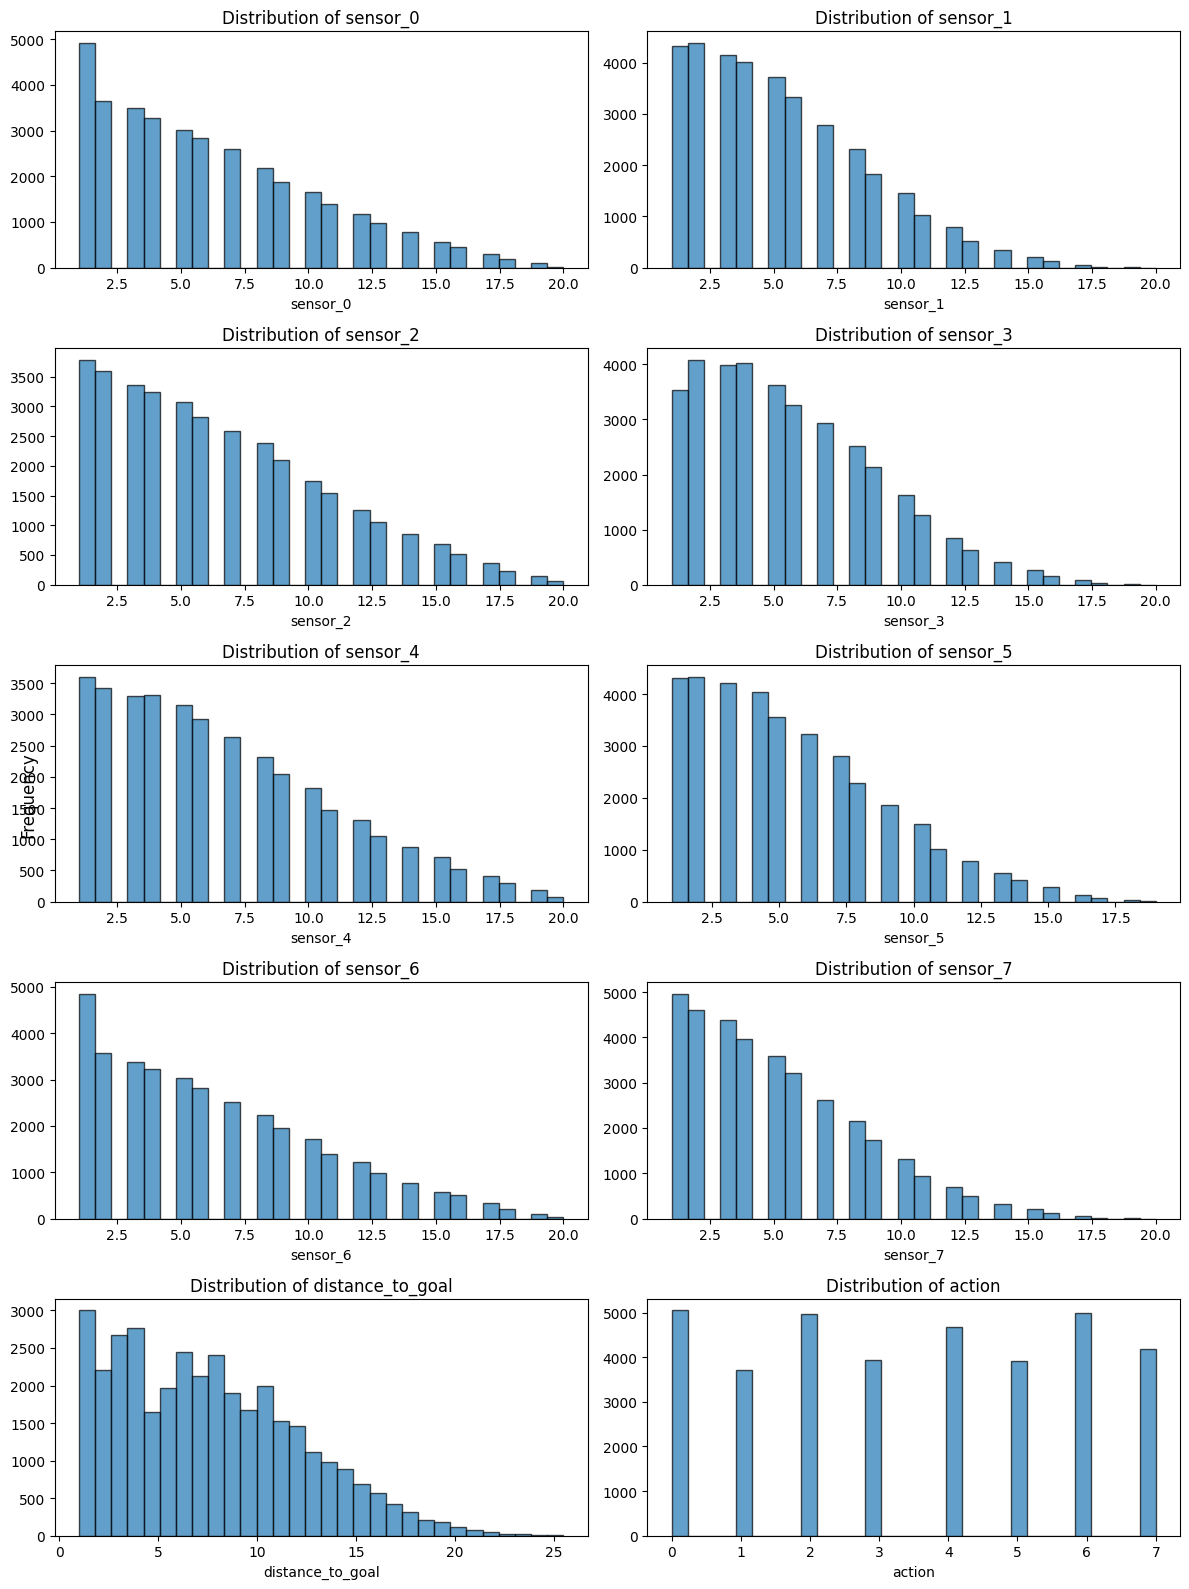

In [71]:
# Example usage:
# Load your data
df = pd.read_csv('../training_data.csv')

# Plot histograms for sensor readings
sensor_cols = [f'sensor_{i}' for i in range(8)] + ['distance_to_goal', 'action']
histogram_plots(df, sensor_cols, 2, figsize=(12, 16))



# Run analysis

=== RUN-LEVEL DIFFERENCES ANALYSIS ===
Total runs: 3000
Total samples: 35452
Average samples per run: 11.8

--- MEAN SENSOR VALUES PER RUN ---
Mean sensor values across all runs:
  Sensor 0: 6.11 ± 2.18
  Sensor 1: 5.35 ± 1.85
  Sensor 2: 6.49 ± 2.14
  Sensor 3: 5.65 ± 1.79
  Sensor 4: 6.59 ± 2.17
  Sensor 5: 5.39 ± 1.89
  Sensor 6: 6.20 ± 2.24
  Sensor 7: 5.15 ± 1.91

Sample of runs and their mean sensor values:
        sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  \
run_id                                                                         
0           8.38      4.12      5.88      6.50      5.50      4.25      7.38   
1           6.44      7.11      9.33      6.67      5.67      2.33      2.33   
2           7.75      4.31      5.81      3.94      5.06      5.88      4.88   
3           6.00      5.70      7.00      4.70      6.10      6.00      3.70   
4           9.00      6.08      8.42      5.50      5.33      5.00      5.25   
5           8.00      7

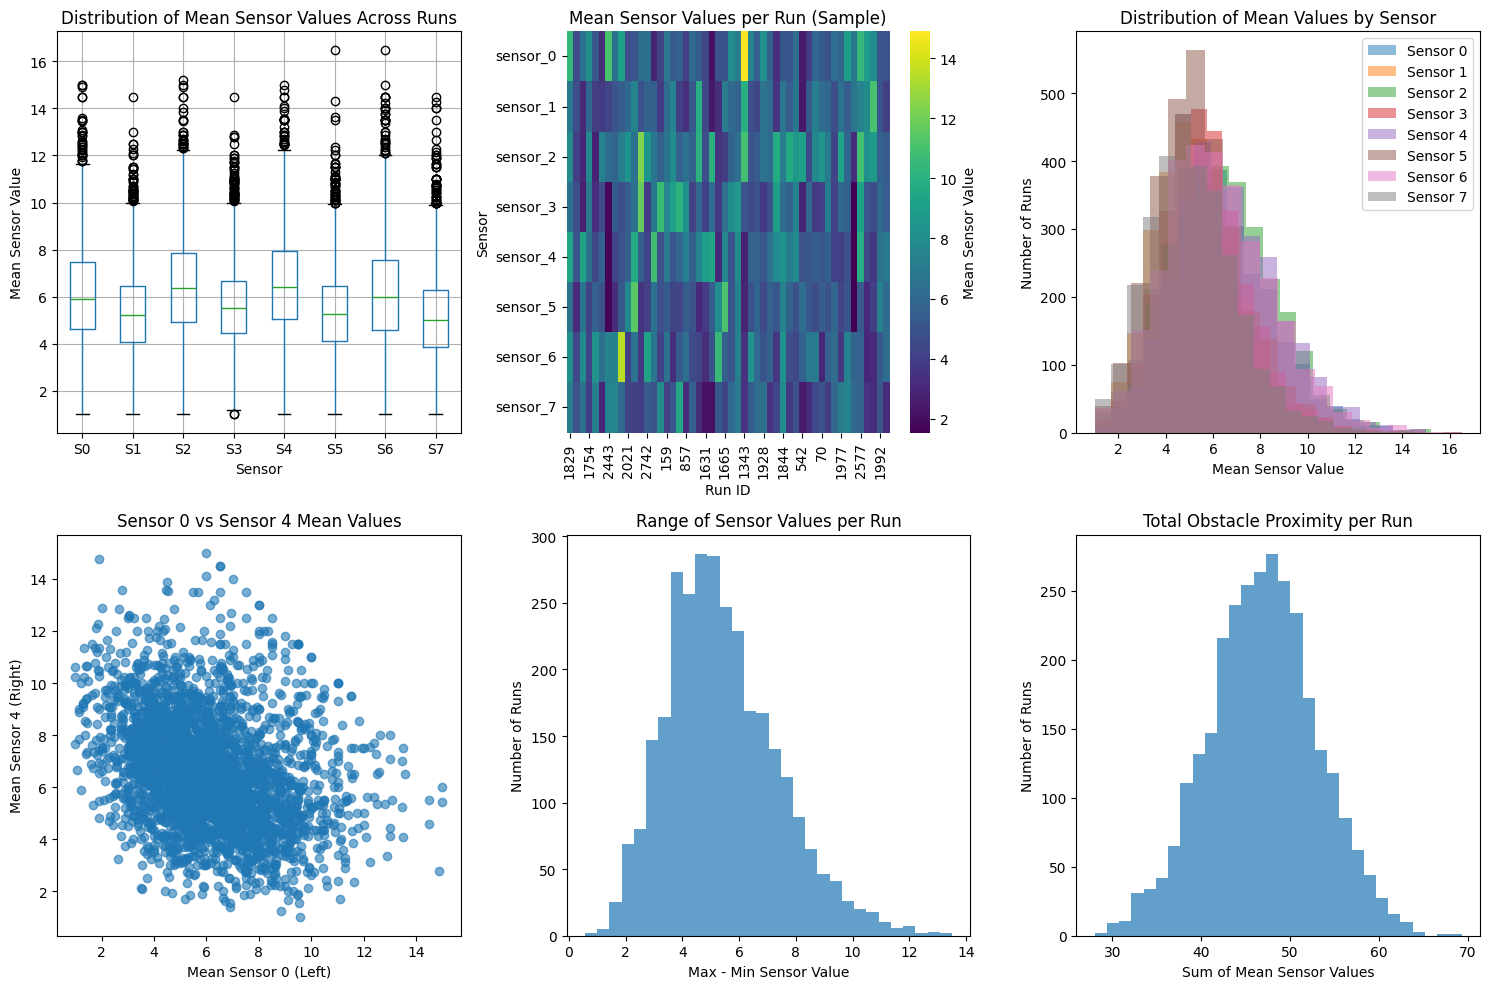


--- MEAN ACTIONS PER RUN ---
Mean action values across all runs:
  Overall mean action: 3.48 ± 1.99
  Min mean action: 0.00
  Max mean action: 7.00

Sample of runs and their mean actions:
  Run 0: 6.75
  Run 1: 5.56
  Run 2: 4.62
  Run 3: 0.40
  Run 4: 2.33
  Run 5: 5.09
  Run 6: 5.44
  Run 7: 3.46
  Run 8: 4.58
  Run 9: 1.82

Action frequency statistics across runs:
  Action 0: 0.140 ± 0.271
  Action 1: 0.108 ± 0.226
  Action 2: 0.138 ± 0.268
  Action 3: 0.113 ± 0.234
  Action 4: 0.130 ± 0.261
  Action 5: 0.113 ± 0.235
  Action 6: 0.139 ± 0.271
  Action 7: 0.120 ± 0.240


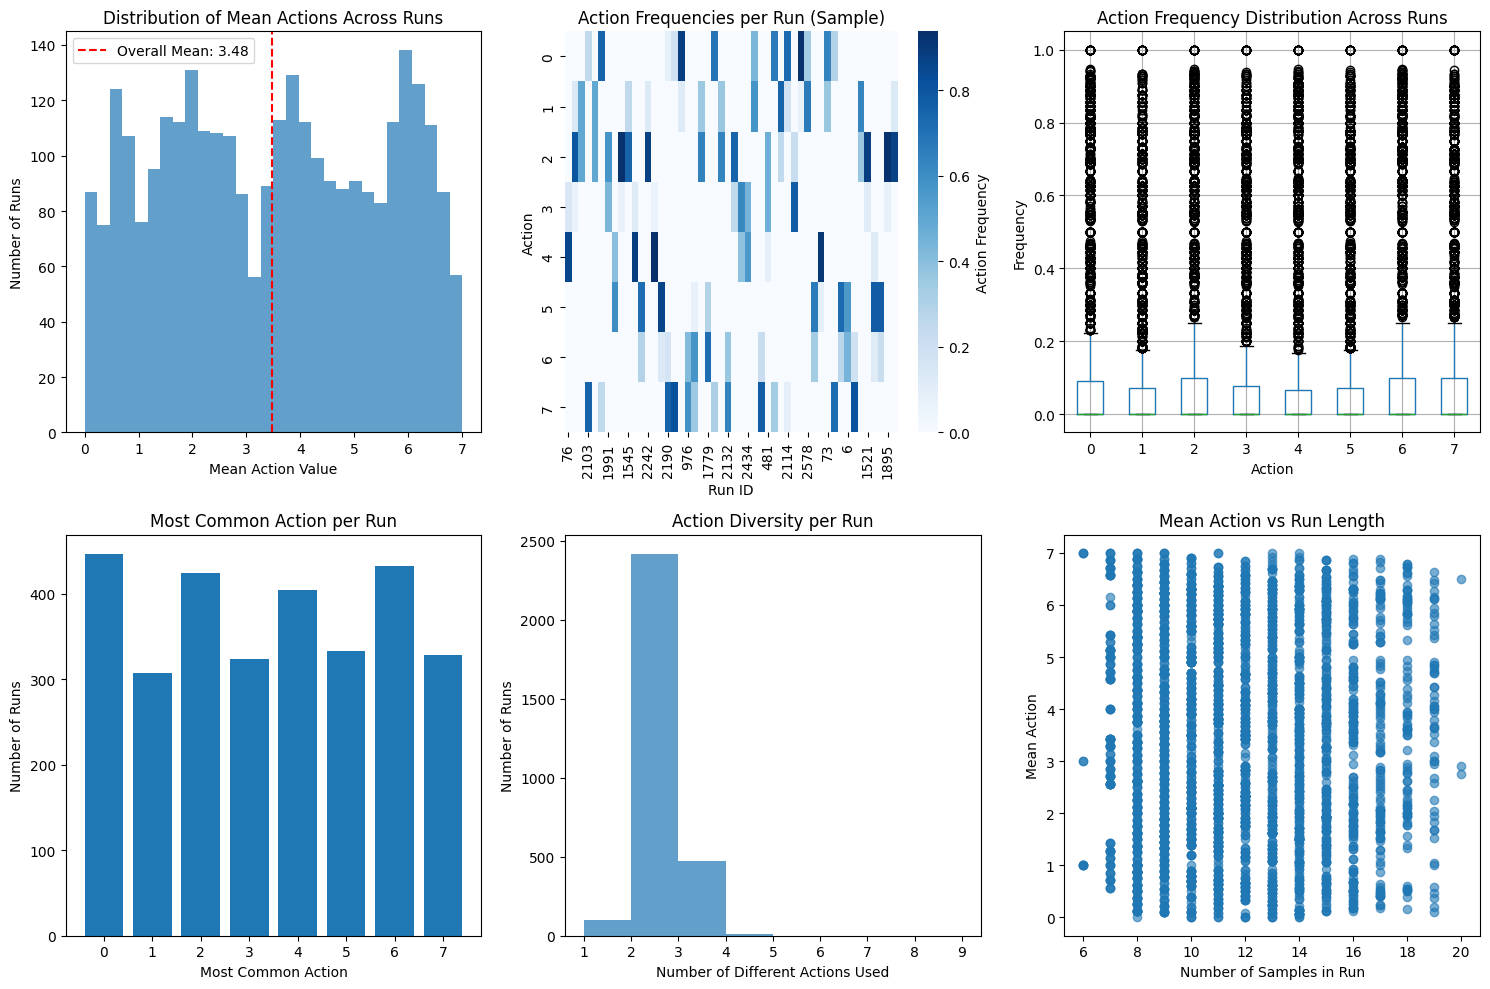


--- IDENTIFYING UNDER-REPRESENTED WORLD CONFIGURATIONS ---
Identifying extreme world configurations:

Sensor 0 extremes:
  Low values (≤2.88): 154 runs (5.1%)
  High values (≥10.00): 152 runs (5.1%)

Sensor 1 extremes:
  Low values (≤2.62): 153 runs (5.1%)
  High values (≥8.62): 150 runs (5.0%)

Sensor 2 extremes:
  Low values (≤3.29): 152 runs (5.1%)
  High values (≥10.09): 150 runs (5.0%)

Sensor 3 extremes:
  Low values (≤3.00): 167 runs (5.6%)
  High values (≥8.80): 151 runs (5.0%)

Sensor 4 extremes:
  Low values (≤3.30): 151 runs (5.0%)
  High values (≥10.50): 153 runs (5.1%)

Sensor 5 extremes:
  Low values (≤2.60): 150 runs (5.0%)
  High values (≥8.75): 152 runs (5.1%)

Sensor 6 extremes:
  Low values (≤2.89): 150 runs (5.0%)
  High values (≥10.13): 150 runs (5.0%)

Sensor 7 extremes:
  Low values (≤2.35): 150 runs (5.0%)
  High values (≥8.50): 156 runs (5.2%)

Mean action extremes:
  Low mean actions (≤0.43): 150 runs (5.0%)
  High mean actions (≥6.50): 157 runs (5.2%)

Examp

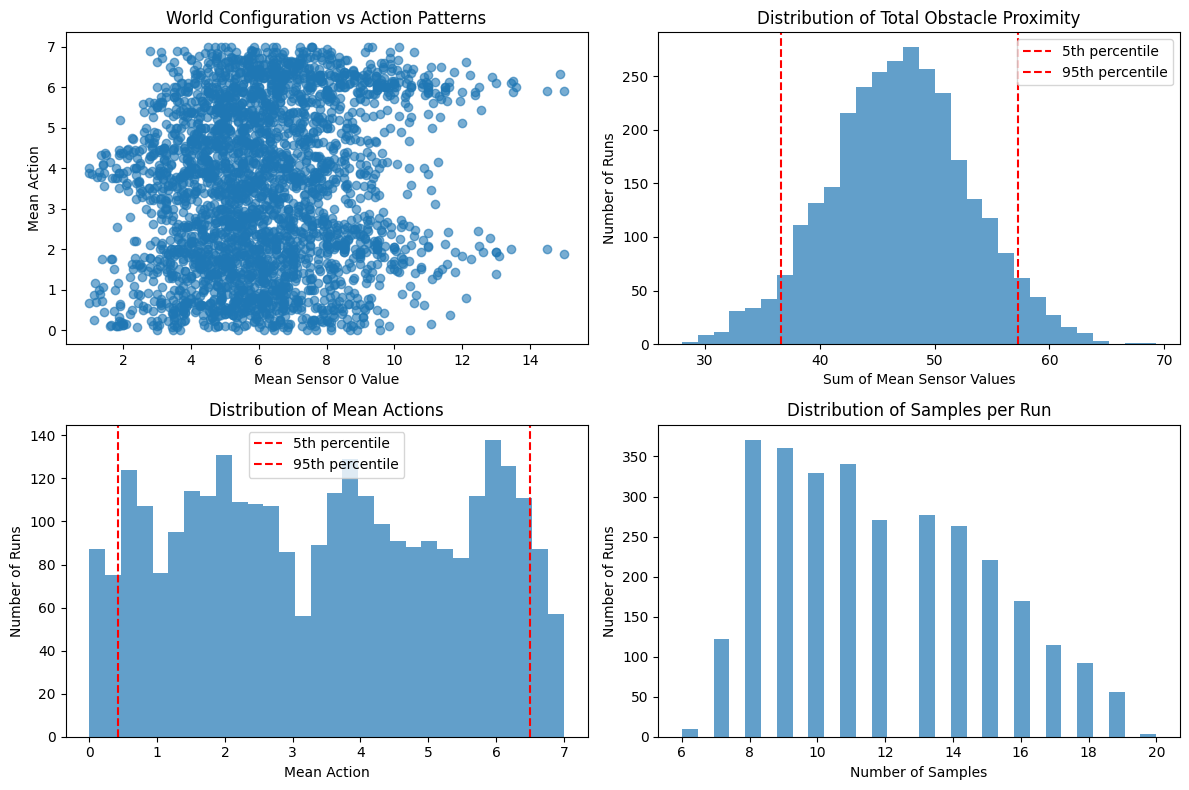

In [84]:
# Run-Level Analysis: Mean Sensor Values and Mean Actions per Run
# Exactly as requested: analyze differences across runs using mean values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_run_differences(df):
    """
    Analyze differences across runs by computing mean sensor values and mean actions per run.
    This shows how different random worlds influence sensor readings and action frequencies.
    """
    print("=== RUN-LEVEL DIFFERENCES ANALYSIS ===")
    print(f"Total runs: {df['run_id'].nunique()}")
    print(f"Total samples: {len(df)}")
    print(f"Average samples per run: {len(df) / df['run_id'].nunique():.1f}")
    
    # 1. Mean sensor values per run
    analyze_mean_sensor_values_per_run(df)
    
    # 2. Mean actions per run
    analyze_mean_actions_per_run(df)
    
    # 3. Identify under-represented world configurations
    identify_underrepresented_worlds(df)

def analyze_mean_sensor_values_per_run(df):
    """Compute mean sensor values per run to see world configuration differences."""
    print("\n--- MEAN SENSOR VALUES PER RUN ---")
    
    # Compute mean sensor values for each run
    sensor_cols = [f'sensor_{i}' for i in range(8)]
    mean_sensors_per_run = df.groupby('run_id')[sensor_cols].mean()
    
    # Basic statistics
    print("Mean sensor values across all runs:")
    overall_means = mean_sensors_per_run.mean()
    overall_stds = mean_sensors_per_run.std()
    
    for i in range(8):
        sensor_col = f'sensor_{i}'
        print(f"  Sensor {i}: {overall_means[sensor_col]:.2f} ± {overall_stds[sensor_col]:.2f}")
    
    # Show sample of runs with their mean sensor values
    print(f"\nSample of runs and their mean sensor values:")
    sample_runs = mean_sensors_per_run.head(10)
    print(sample_runs.round(2))
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Distribution of mean sensor values across runs
    plt.subplot(2, 3, 1)
    mean_sensors_per_run.boxplot()
    plt.title('Distribution of Mean Sensor Values Across Runs')
    plt.xlabel('Sensor')
    plt.ylabel('Mean Sensor Value')
    plt.xticks(range(1, 9), [f'S{i}' for i in range(8)])
    
    # Plot 2: Heatmap showing mean sensor values for each run (sample)
    plt.subplot(2, 3, 2)
    sample_for_heatmap = mean_sensors_per_run.sample(min(50, len(mean_sensors_per_run)))
    sns.heatmap(sample_for_heatmap.T, cmap='viridis', cbar_kws={'label': 'Mean Sensor Value'})
    plt.title('Mean Sensor Values per Run (Sample)')
    plt.xlabel('Run ID')
    plt.ylabel('Sensor')
    
    # Plot 3: Histogram of mean values for each sensor
    plt.subplot(2, 3, 3)
    for i in range(8):
        plt.hist(mean_sensors_per_run[f'sensor_{i}'], alpha=0.5, label=f'Sensor {i}', bins=20)
    plt.title('Distribution of Mean Values by Sensor')
    plt.xlabel('Mean Sensor Value')
    plt.ylabel('Number of Runs')
    plt.legend()
    
    # Plot 4: Scatter plot of sensor pairs to see relationships
    plt.subplot(2, 3, 4)
    plt.scatter(mean_sensors_per_run['sensor_0'], mean_sensors_per_run['sensor_4'], alpha=0.6)
    plt.xlabel('Mean Sensor 0 (Left)')
    plt.ylabel('Mean Sensor 4 (Right)')
    plt.title('Sensor 0 vs Sensor 4 Mean Values')
    
    # Plot 5: Range of sensor values per run
    plt.subplot(2, 3, 5)
    sensor_ranges = mean_sensors_per_run.max(axis=1) - mean_sensors_per_run.min(axis=1)
    plt.hist(sensor_ranges, bins=30, alpha=0.7)
    plt.title('Range of Sensor Values per Run')
    plt.xlabel('Max - Min Sensor Value')
    plt.ylabel('Number of Runs')
    
    # Plot 6: Total obstacle proximity per run
    plt.subplot(2, 3, 6)
    total_proximity = mean_sensors_per_run.sum(axis=1)
    plt.hist(total_proximity, bins=30, alpha=0.7)
    plt.title('Total Obstacle Proximity per Run')
    plt.xlabel('Sum of Mean Sensor Values')
    plt.ylabel('Number of Runs')
    
    plt.tight_layout()
    plt.show()
    
    return mean_sensors_per_run

def analyze_mean_actions_per_run(df):
    """Compute mean actions per run to see action pattern differences."""
    print("\n--- MEAN ACTIONS PER RUN ---")
    
    # Compute mean action per run
    mean_actions_per_run = df.groupby('run_id')['action'].mean()
    
    # Basic statistics
    print("Mean action values across all runs:")
    print(f"  Overall mean action: {mean_actions_per_run.mean():.2f} ± {mean_actions_per_run.std():.2f}")
    print(f"  Min mean action: {mean_actions_per_run.min():.2f}")
    print(f"  Max mean action: {mean_actions_per_run.max():.2f}")
    
    # Show sample of runs with their mean actions
    print(f"\nSample of runs and their mean actions:")
    sample_runs = mean_actions_per_run.head(10)
    for run_id, mean_action in sample_runs.items():
        print(f"  Run {run_id}: {mean_action:.2f}")
    
    # Action frequency per run (more detailed than just mean)
    action_freq_per_run = df.groupby('run_id')['action'].value_counts(normalize=True).unstack(fill_value=0)
    
    print(f"\nAction frequency statistics across runs:")
    for action in sorted(action_freq_per_run.columns):
        freq_mean = action_freq_per_run[action].mean()
        freq_std = action_freq_per_run[action].std()
        print(f"  Action {action}: {freq_mean:.3f} ± {freq_std:.3f}")
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Distribution of mean actions across runs
    plt.subplot(2, 3, 1)
    plt.hist(mean_actions_per_run, bins=30, alpha=0.7)
    plt.title('Distribution of Mean Actions Across Runs')
    plt.xlabel('Mean Action Value')
    plt.ylabel('Number of Runs')
    plt.axvline(mean_actions_per_run.mean(), color='red', linestyle='--', 
                label=f'Overall Mean: {mean_actions_per_run.mean():.2f}')
    plt.legend()
    
    # Plot 2: Action frequency heatmap across runs (sample)
    plt.subplot(2, 3, 2)
    sample_for_heatmap = action_freq_per_run.sample(min(50, len(action_freq_per_run)))
    sns.heatmap(sample_for_heatmap.T, cmap='Blues', cbar_kws={'label': 'Action Frequency'})
    plt.title('Action Frequencies per Run (Sample)')
    plt.xlabel('Run ID')
    plt.ylabel('Action')
    
    # Plot 3: Box plot of action frequencies across runs
    plt.subplot(2, 3, 3)
    action_freq_per_run.boxplot()
    plt.title('Action Frequency Distribution Across Runs')
    plt.xlabel('Action')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Plot 4: Most common action per run
    plt.subplot(2, 3, 4)
    most_common_action_per_run = action_freq_per_run.idxmax(axis=1)
    action_counts = most_common_action_per_run.value_counts()
    plt.bar(action_counts.index, action_counts.values)
    plt.title('Most Common Action per Run')
    plt.xlabel('Most Common Action')
    plt.ylabel('Number of Runs')
    
    # Plot 5: Action diversity per run (number of different actions used)
    plt.subplot(2, 3, 5)
    action_diversity = (action_freq_per_run > 0).sum(axis=1)
    plt.hist(action_diversity, bins=range(1, 10), alpha=0.7)
    plt.title('Action Diversity per Run')
    plt.xlabel('Number of Different Actions Used')
    plt.ylabel('Number of Runs')
    
    # Plot 6: Mean action vs total samples per run
    plt.subplot(2, 3, 6)
    samples_per_run = df.groupby('run_id').size()
    plt.scatter(samples_per_run, mean_actions_per_run, alpha=0.6)
    plt.xlabel('Number of Samples in Run')
    plt.ylabel('Mean Action')
    plt.title('Mean Action vs Run Length')
    
    plt.tight_layout()
    plt.show()
    
    return mean_actions_per_run, action_freq_per_run

def identify_underrepresented_worlds(df):
    """Identify world configurations that might be under-represented."""
    print("\n--- IDENTIFYING UNDER-REPRESENTED WORLD CONFIGURATIONS ---")
    
    # Get mean sensor values and mean actions per run
    sensor_cols = [f'sensor_{i}' for i in range(8)]
    mean_sensors_per_run = df.groupby('run_id')[sensor_cols].mean()
    mean_actions_per_run = df.groupby('run_id')['action'].mean()
    
    # Combine into single dataframe
    run_characteristics = mean_sensors_per_run.copy()
    run_characteristics['mean_action'] = mean_actions_per_run
    
    # Add other characteristics
    run_characteristics['samples_count'] = df.groupby('run_id').size()
    if 'distance_to_goal' in df.columns:
        run_characteristics['mean_distance'] = df.groupby('run_id')['distance_to_goal'].mean()
    
    # Identify extreme runs (potential under-represented configurations)
    print("Identifying extreme world configurations:")
    
    # Find runs with extreme sensor values
    for i in range(8):
        sensor_col = f'sensor_{i}'
        # Lowest 5% and highest 5%
        low_threshold = run_characteristics[sensor_col].quantile(0.05)
        high_threshold = run_characteristics[sensor_col].quantile(0.95)
        
        low_runs = run_characteristics[run_characteristics[sensor_col] <= low_threshold]
        high_runs = run_characteristics[run_characteristics[sensor_col] >= high_threshold]
        
        print(f"\nSensor {i} extremes:")
        print(f"  Low values (≤{low_threshold:.2f}): {len(low_runs)} runs ({len(low_runs)/len(run_characteristics):.1%})")
        print(f"  High values (≥{high_threshold:.2f}): {len(high_runs)} runs ({len(high_runs)/len(run_characteristics):.1%})")
    
    # Find runs with extreme mean actions
    low_action_threshold = mean_actions_per_run.quantile(0.05)
    high_action_threshold = mean_actions_per_run.quantile(0.95)
    
    low_action_runs = run_characteristics[run_characteristics['mean_action'] <= low_action_threshold]
    high_action_runs = run_characteristics[run_characteristics['mean_action'] >= high_action_threshold]
    
    print(f"\nMean action extremes:")
    print(f"  Low mean actions (≤{low_action_threshold:.2f}): {len(low_action_runs)} runs ({len(low_action_runs)/len(run_characteristics):.1%})")
    print(f"  High mean actions (≥{high_action_threshold:.2f}): {len(high_action_runs)} runs ({len(high_action_runs)/len(run_characteristics):.1%})")
    
    # Show examples of extreme runs
    print(f"\nExamples of potentially under-represented world types:")
    
    print(f"\nRuns with very low obstacle proximity (open worlds):")
    total_proximity = mean_sensors_per_run.sum(axis=1)
    open_worlds = run_characteristics.loc[total_proximity.nsmallest(3).index]
    print(open_worlds.round(2))
    
    print(f"\nRuns with very high obstacle proximity (dense worlds):")
    dense_worlds = run_characteristics.loc[total_proximity.nlargest(3).index]
    print(dense_worlds.round(2))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Scatter plot of mean sensor 0 vs mean action
    plt.subplot(2, 2, 1)
    plt.scatter(run_characteristics['sensor_0'], run_characteristics['mean_action'], alpha=0.6)
    plt.xlabel('Mean Sensor 0 Value')
    plt.ylabel('Mean Action')
    plt.title('World Configuration vs Action Patterns')
    
    # Plot 2: Distribution of total obstacle proximity
    plt.subplot(2, 2, 2)
    total_proximity = mean_sensors_per_run.sum(axis=1)
    plt.hist(total_proximity, bins=30, alpha=0.7)
    plt.axvline(total_proximity.quantile(0.05), color='red', linestyle='--', label='5th percentile')
    plt.axvline(total_proximity.quantile(0.95), color='red', linestyle='--', label='95th percentile')
    plt.title('Distribution of Total Obstacle Proximity')
    plt.xlabel('Sum of Mean Sensor Values')
    plt.ylabel('Number of Runs')
    plt.legend()
    
    # Plot 3: Mean action distribution with extremes highlighted
    plt.subplot(2, 2, 3)
    plt.hist(mean_actions_per_run, bins=30, alpha=0.7)
    plt.axvline(low_action_threshold, color='red', linestyle='--', label='5th percentile')
    plt.axvline(high_action_threshold, color='red', linestyle='--', label='95th percentile')
    plt.title('Distribution of Mean Actions')
    plt.xlabel('Mean Action')
    plt.ylabel('Number of Runs')
    plt.legend()
    
    # Plot 4: Samples per run distribution
    plt.subplot(2, 2, 4)
    plt.hist(run_characteristics['samples_count'], bins=30, alpha=0.7)
    plt.title('Distribution of Samples per Run')
    plt.xlabel('Number of Samples')
    plt.ylabel('Number of Runs')
    
    plt.tight_layout()
    plt.show()
    
    return run_characteristics

analyze_run_differences(df)

# Label conflict analysis

In [81]:
def create_numeric_percentile_bins(df, column_name, num_bins=4):
    """
    Create percentile bins with ascending numeric codes (1, 2, 3, 4)
    """
    # Create percentile bins and assign numeric labels
    binned_column = pd.qcut(df[column_name], q=num_bins, labels=range(1, num_bins + 1), duplicates='drop')
    
    # Get the actual bin edges for reference
    _, bin_edges = pd.qcut(df[column_name], q=num_bins, retbins=True, duplicates='drop')
    
    return binned_column.astype(int), bin_edges

variables_to_bin = [f'sensor_{i}' for i in range(8)] + ['goal_direction']

for var in variables_to_bin:
    # Create numeric bins
    binned_col, edges = create_numeric_percentile_bins(df, var, num_bins=4)
    
    # Add the binned column to dataframe
    df[f'{var}_Q'] = binned_col
    
    # Print bin information
    # print(f"\n{var}_Q:")
    # print(f"  Overall range: {df[var].min():.2f} to {df[var].max():.2f}")
    # print(f"  Quartile boundaries and coding:")
    
    for i in range(len(edges) - 1):
        quartile_num = i + 1
        start_val = edges[i]
        end_val = edges[i + 1]
        count = (df[f'{var}_Q'] == quartile_num).sum()
        percentage = count / len(df) * 100
        
        # print(f"    {quartile_num}: {start_val:8.2f} to {end_val:8.2f} | {count:,} obs ({percentage:.1f}%)")
    
    # Show the numeric distribution
    # print(f"  Value counts: {dict(df[f'{var}_Q'].value_counts().sort_index())}")

In [82]:
unique_patterns = df.groupby(['sensor_0_Q', 'sensor_1_Q', 'sensor_2_Q', 'sensor_3_Q', 'sensor_4_Q', 'sensor_5_Q', 'sensor_6_Q', 'sensor_7_Q'])['action'].nunique()
# Without goal_direction: unique sensor patterns
unique_sensor_patterns = df.groupby(['sensor_0_Q', 'sensor_1_Q', 'sensor_2_Q', 'sensor_3_Q', 
                                    'sensor_4_Q', 'sensor_5_Q', 'sensor_6_Q', 'sensor_7_Q'])['action'].nunique()

print("Unique sensor patterns (without goal_direction):", len(unique_sensor_patterns))

# With goal_direction: unique sensor + goal_direction patterns  
unique_patterns_with_goal = df.groupby(['sensor_0_Q', 'sensor_1_Q', 'sensor_2_Q', 'sensor_3_Q', 
                                       'sensor_4_Q', 'sensor_5_Q', 'sensor_6_Q', 'sensor_7_Q', 
                                       'goal_direction_Q'])['action'].nunique()

print("Unique patterns (with goal_direction):", len(unique_patterns_with_goal))

# Compare label consistency
conflicted_without_goal = (unique_sensor_patterns > 1).sum()
conflicted_with_goal = (unique_patterns_with_goal > 1).sum()

print(f"\nLabel conflicts:")
print(f"Without goal_direction: {conflicted_without_goal}/{len(unique_sensor_patterns)} patterns have multiple actions ({conflicted_without_goal/len(unique_sensor_patterns):.1%})")
print(f"With goal_direction: {conflicted_with_goal}/{len(unique_patterns_with_goal)} patterns have multiple actions ({conflicted_with_goal/len(unique_patterns_with_goal):.1%})")



Unique sensor patterns (without goal_direction): 21128
Unique patterns (with goal_direction): 29213

Label conflicts:
Without goal_direction: 6700/21128 patterns have multiple actions (31.7%)
With goal_direction: 2568/29213 patterns have multiple actions (8.8%)


# Machine Learning Convergence Analysis

This study **diagnoses why machine learning models fail to learn** from your robot navigation data by analyzing 6 core learning obstacles.

## What This Analysis Does

Instead of just saying "our model only gets 37% accuracy," this study **explains WHY** by revealing specific mathematical obstacles to machine learning convergence.

### 1. Label Noise & Conflicting Examples
- **Purpose**: Finds identical sensor readings that require different actions
- **Problem**: The "impossible to learn" scenario where same inputs have different correct outputs
- **Impact**: Model gets contradictory training signals → gradient confusion

### 2. Class Imbalance Impact  
- **Purpose**: Quantifies how severely some actions are underrepresented
- **Problem**: Rare but critical actions (like detours) get ignored during training
- **Impact**: Model becomes biased toward majority classes → poor performance on edge cases

### 3. Feature Separability Analysis
- **Purpose**: Tests if features can actually distinguish between different actions using Linear Discriminant Analysis
- **Problem**: Features may not contain enough information to separate action classes
- **Impact**: Even perfect algorithms can't learn if classes aren't separable → fundamental data limitation

### 4. Decision Boundary Complexity
- **Purpose**: Measures how deep decision trees need to be to capture patterns
- **Problem**: Complex boundaries require complex models (overfitting risk) vs simple boundaries (underfitting)
- **Impact**: Indicates optimal model complexity and overfitting tendency

### 5. Local vs Global Pattern Consistency
- **Purpose**: Checks if same patterns mean different things in different contexts
- **Problem**: Sensor patterns might require different actions when close vs far from goal
- **Impact**: Context-dependent decisions confuse models → inconsistent learning signals

### 6. Gradient/Learning Signal Quality
- **Purpose**: Analyzes if similar states have similar actions (smooth learning landscape)
- **Problem**: Noisy neighborhoods where nearby states have different optimal actions
- **Impact**: Gradients point in conflicting directions → unstable training

## The Key Insight

This is a **diagnostic toolkit** that pinpoints exactly what makes your dataset "unlearnable" and quantifies each problem so you know which issues to fix first.

## Expected Findings

**Without goal_direction:**
- High label conflicts (~72% of states)
- Poor feature separability 
- Complex decision boundaries needed
- Inconsistent local patterns
- Noisy learning signals

**With goal_direction:**
- Dramatically reduced label conflicts
- Better feature separability
- Simpler decision boundaries
- More consistent patterns
- Smoother learning signals

## Bottom Line

Rather than guessing why your ML models struggle, this analysis provides **quantitative evidence** of specific obstacles:

- **High label conflicts** → Model gets contradictory training signals
- **Severe imbalance** → Model ignores rare but critical actions  
- **Poor separability** → Features can't distinguish actions linearly
- **High complexity** → Simple models underfit, complex ones overfit
- **Inconsistent patterns** → Same inputs mean different things in different contexts
- **Noisy signals** → Gradients point in conflicting directions

Each analysis directly explains a specific failure mode and helps prioritize which data or modeling issues to address first.


In [73]:
# How well can features separate different actions?
def analyze_feature_separability(df, include_goal_direction=True):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.preprocessing import StandardScaler
    
    # Explicitly choose features based on parameter
    if include_goal_direction:
        feature_cols = [f'sensor_{i}' for i in range(8)] + ['distance_to_goal', 'goal_direction']
        scenario_name = "With goal_direction"
    else:
        feature_cols = [f'sensor_{i}' for i in range(8)] + ['distance_to_goal']
        scenario_name = "Without goal_direction"
    
    print(f"=== Feature Separability Analysis - {scenario_name} ===")
    
    X = df[feature_cols].values
    y = df['action'].values
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Try LDA to see how separable classes are
    try:
        lda = LinearDiscriminantAnalysis()
        X_lda = lda.fit_transform(X_scaled, y)
        
        # Plot first 2 LDA components
        plt.figure(figsize=(12, 5))
        plt.suptitle(f'Feature Separability Analysis - {scenario_name}')
        
        plt.subplot(1, 2, 1)
        for action in sorted(df['action'].unique()):
            mask = y == action
            if X_lda[mask].shape[0] > 0:
                plt.scatter(X_lda[mask, 0], X_lda[mask, 1] if X_lda.shape[1] > 1 else np.zeros(mask.sum()), 
                           alpha=0.5, label=f'Action {action}', s=10)
        plt.xlabel('LDA Component 1')
        plt.ylabel('LDA Component 2')
        plt.title('Linear Discriminant Analysis')
        plt.legend()
        
        # Feature importance from LDA
        plt.subplot(1, 2, 2)
        feature_importance = np.abs(lda.coef_[0] if len(lda.coef_.shape) == 2 else lda.coef_)
        plt.bar(range(len(feature_cols)), feature_importance)
        plt.xticks(range(len(feature_cols)), feature_cols, rotation=45)
        plt.title('Feature Discriminative Power')
        plt.tight_layout()
        plt.show()
        
        print(f"LDA explained variance ratio: {lda.explained_variance_ratio_[:3]}")
        
    except Exception as e:
        print(f"LDA failed: {e}")


=== Feature Separability Analysis - Without goal_direction ===


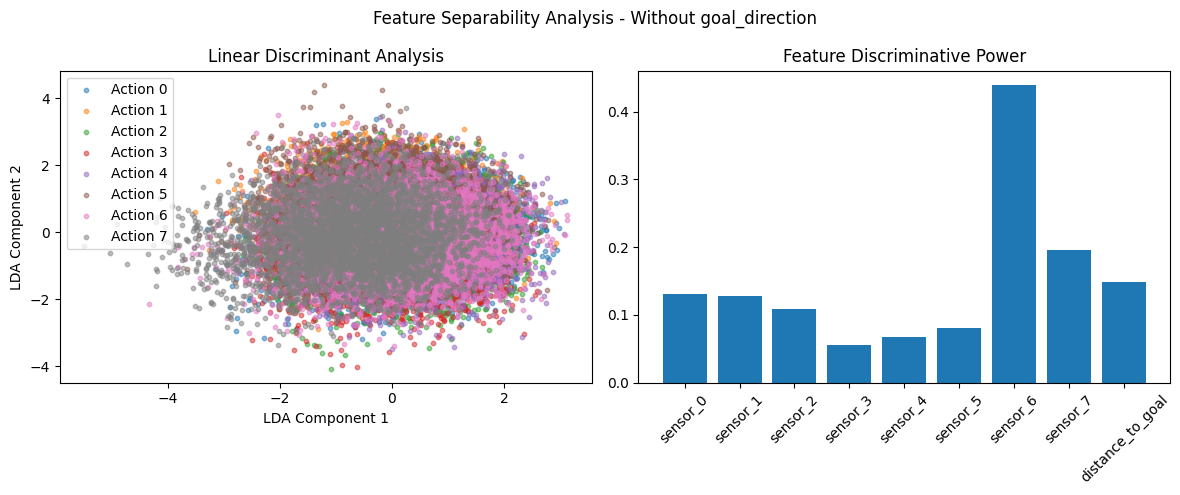

LDA explained variance ratio: [0.34313234 0.25527979 0.2434876 ]


In [74]:
analyze_feature_separability(df, False)

=== Feature Separability Analysis - With goal_direction ===


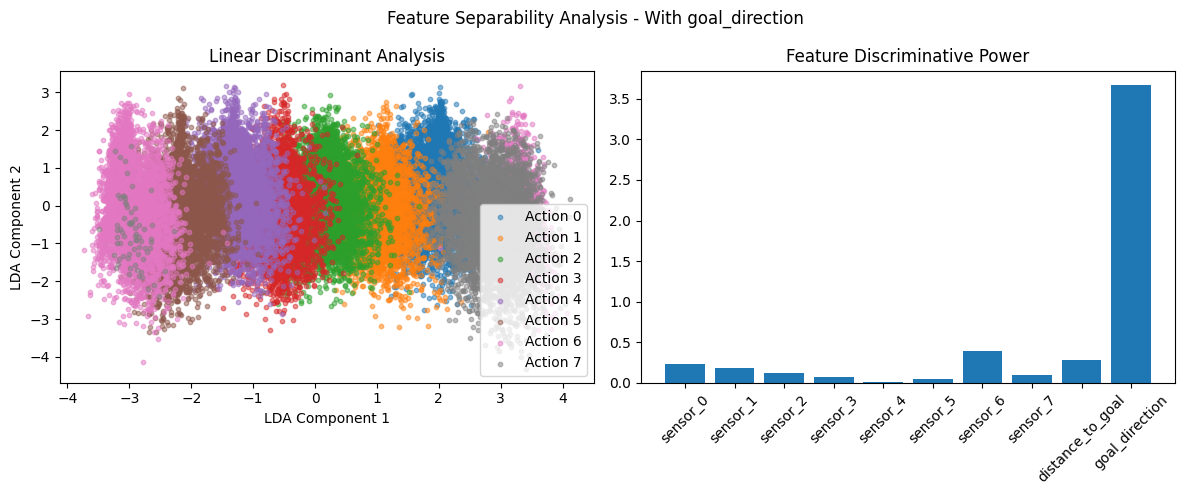

LDA explained variance ratio: [0.91389696 0.03085718 0.02480169]


In [75]:
analyze_feature_separability(df, True)